<>:198: SyntaxWarning: invalid escape sequence '\p'
<>:198: SyntaxWarning: invalid escape sequence '\p'
<>:198: SyntaxWarning: invalid escape sequence '\p'
<>:198: SyntaxWarning: invalid escape sequence '\p'
<>:198: SyntaxWarning: invalid escape sequence '\p'
<>:198: SyntaxWarning: invalid escape sequence '\p'
<>:198: SyntaxWarning: invalid escape sequence '\p'
<>:198: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Dirac\AppData\Local\Temp\ipykernel_50852\2170919483.py:198: SyntaxWarning: invalid escape sequence '\p'
  xticks(x,['$-\pi$','0','$\pi$'],fontsize=18);yticks(x,['$-\pi$','0','$\pi$'],fontsize=18);xlabel('$k_x$',fontsize=22);ylabel('$k_y$',fontsize=22)
C:\Users\Dirac\AppData\Local\Temp\ipykernel_50852\2170919483.py:198: SyntaxWarning: invalid escape sequence '\p'
  xticks(x,['$-\pi$','0','$\pi$'],fontsize=18);yticks(x,['$-\pi$','0','$\pi$'],fontsize=18);xlabel('$k_x$',fontsize=22);ylabel('$k_y$',fontsize=22)
C:\Users\Dirac\AppData\Local\Temp\ipykernel_50852\2170919483.p

n1: 1.792575
m: 0.0
n1: 0.0
m: -5.0
n1: 0.0
m: -2.5
n1: 0.1164375
m: -1.25
n1: 1.04760625
m: -0.625
n1: 1.51459375
m: -0.3125
n1: 1.24913125
m: -0.46875
n1: 1.37735625
m: -0.390625
n1: 1.45204375
m: -0.3515625
n1: 1.48409375
m: -0.33203125
n1: 1.49934375
m: -0.322265625
n1: 1.50706875
m: -0.3173828125
n1: 1.50306875
m: -0.31982421875
n1: 1.50124375
m: -0.321044921875
n1: 1.50064375
m: -0.3216552734375
n1: 1.49986875
m: -0.32196044921875
density = 1.49986875
mu = -0.32196044921875
len(x1): 2180
len(x2): 0
len(x3): 252
len(x4): 616
执行时间: 47.218907594680786 s


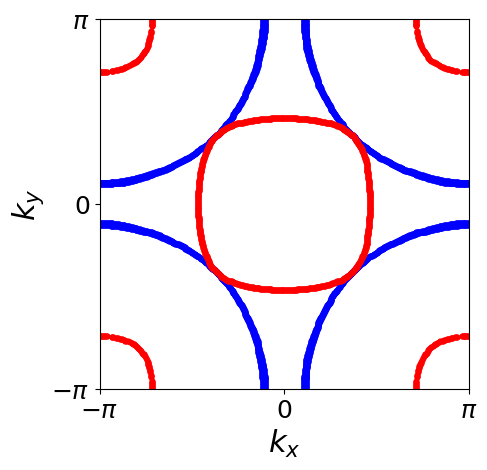

In [17]:
import math
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from pylab import *
import time

start_time = time.time()

pi = math.pi
ex = 0.506
ez = 0.0
t11x  = -0.515
t22x  = -0.11
t12x  = 0.243
s220  = -0.666

N = 200

n = 1.5

sym = 'spm'
#sym = 'dx2y2'
#sym = 'dxy'

###  Get mu  ################################################################################
a1 = -10; b1 = 10  ###二分法取值区间
m = (a1 + b1) / 2.0  ###暂定mu值
d = 0.0;d1=0.0;d2=0.0

X = []
while n >= 0.0:
    for qx in arange(-pi,pi,pi/N):
        for qy in arange(-pi,pi,pi/N):
            Hx = ex + 2 * t11x * (cos(qx)+cos(qy)) - m
            Hz = ez + 2 * t22x * (cos(qx)+cos(qy)) - m
            V = 2 * t12x * (cos(qx)-cos(qy))
            Hzp = s220 
            
            E1 = Hx/2 + Hz/2 - Hzp/2 - sqrt(Hx**2 - 2*Hx*Hz + 2*Hx*Hzp + Hz**2 - 2*Hz*Hzp + Hzp**2 + 4*V**2)/2
            E2 = Hx/2 + Hz/2 - Hzp/2 + sqrt(Hx**2 - 2*Hx*Hz + 2*Hx*Hzp + Hz**2 - 2*Hz*Hzp + Hzp**2 + 4*V**2)/2
            E3 = Hx/2 + Hz/2 + Hzp/2 - sqrt(Hx**2 - 2*Hx*Hz - 2*Hx*Hzp + Hz**2 + 2*Hz*Hzp + Hzp**2 + 4*V**2)/2
            E4 = Hx/2 + Hz/2 + Hzp/2 + sqrt(Hx**2 - 2*Hx*Hz - 2*Hx*Hzp + Hz**2 + 2*Hz*Hzp + Hzp**2 + 4*V**2)/2
            X.append(E1);X.append(E2);X.append(E3);X.append(E4)
            count = sum(1 for x in X if x <= 0)
            
            if count == 0:  
                d = d + 0
                
            elif count ==  1:  
                d = d + 2
                
            elif count ==  2:  
                d = d + 4
                
            elif count ==  3:  
                d = d + 6

            elif count ==  4:
                d = d + 8
                
            X = []
                
                    
    n1 = d / (2 * N * 2 * N ) / 2
    print('n1:',n1)
    print('m:',m)
    if abs(n1 - n) < 0.0005:
        break

    if n1 > n:      
        b1 = m
        m = (a1 + b1) / 2.0
        d = 0.0
    elif n1 < n:
        a1 = m
        m = (a1 + b1) / 2.0
        d = 0.0

print('density =', n1)
print('mu =', m)


######  Plot  ####################################################################
mu=m
x1=[]; y1=[]; x2=[]; y2=[]; x3=[]; y3=[];x4=[]; y4=[]
for qx in arange(-pi,pi+pi/N,pi/N):
    for qy in arange(-pi,pi+pi/N,pi/N): 
        Hx = ex + 2 * t11x * (cos(qx)+cos(qy)) - mu
        Hz = ez + 2 * t22x * (cos(qx)+cos(qy)) - mu
        V = 2 * t12x * (cos(qx)-cos(qy))
        Hzp = s220 
        
        Ek1 = Hx/2 + Hz/2 - Hzp/2 - sqrt(Hx**2 - 2*Hx*Hz + 2*Hx*Hzp + Hz**2 - 2*Hz*Hzp + Hzp**2 + 4*V**2)/2 ##antiBonding
        Ek2 = Hx/2 + Hz/2 - Hzp/2 + sqrt(Hx**2 - 2*Hx*Hz + 2*Hx*Hzp + Hz**2 - 2*Hz*Hzp + Hzp**2 + 4*V**2)/2 ##antibonding
        Ek3 = Hx/2 + Hz/2 + Hzp/2 - sqrt(Hx**2 - 2*Hx*Hz - 2*Hx*Hzp + Hz**2 + 2*Hz*Hzp + Hzp**2 + 4*V**2)/2 ##bonding
        Ek4 = Hx/2 + Hz/2 + Hzp/2 + sqrt(Hx**2 - 2*Hx*Hz - 2*Hx*Hzp + Hz**2 + 2*Hz*Hzp + Hzp**2 + 4*V**2)/2 ##boning
        
        if abs(Ek1)<1.e-2:
            x1.append(qx)
            y1.append(qy)
            #print(x1)
            #print(y1) 
        if abs(Ek2)<1.e-2:
            x2.append(qx)
            y2.append(qy)
            #print(x2)
            #print(y2)
        if abs(Ek3)<1.e-3:
            x3.append(qx)
            y3.append(qy)
            #print(x2)
            #print(y2)
        if abs(Ek4)<1.e-2:
            x4.append(qx)
            y4.append(qy)

print('len(x1):',len(x1));print('len(x2):',len(x2));print('len(x3):',len(x3));print('len(x4):',len(x4))
if sym == 'spm':
    if len(x1)>0:
        plt.scatter(x1,y1,s=12,color='b')#,label='bonding')   
    if len(x2)>0:
        plt.scatter(x2,y2,s=12,color='b')#,label='Bonding')  
    if len(x3)>0:
        plt.scatter(x3,y3,s=12,color='r')#,label='Anti-bonding')
    if len(x4)>0:
        plt.scatter(x4,y4,s=12,color='r')#,label='Anti-bonding')

if sym != 'spm':
    for i in range(len(x1)):
        if sym == 'dx2y2':
            A = cos(x1[i])-cos(y1[i])
        if sym == 'dxy':
            A = sin(x1[i])*sin(y1[i])
        if A <= 0:
            x = -A
            plt.scatter(x1[i],y1[i],s=12,color='b',alpha=x/2)
        if A > 0:
            x = A
            plt.scatter(x1[i],y1[i],s=12,color='r',alpha=x/2)
            
    for i in range(len(x2)):
        if sym == 'dx2y2':
            B = cos(x2[i])-cos(y2[i])
        if sym == 'dxy':
            B = sin(x2[i])*sin(y2[i])
        if B <= 0:
            x = -B
            plt.scatter(x2[i],y2[i],s=12,color='b',alpha=x/2)
        if B > 0:
            x = B
            plt.scatter(x2[i],y2[i],s=12,color='r',alpha=x/2)
 
    for i in range(len(x3)):
        if sym == 'dx2y2':
            C = cos(x3[i])-cos(y3[i])
        if sym == 'dxy':
            C = sin(x3[i])*sin(y3[i])
        if C <= 0:
            x = -C
            plt.scatter(x3[i],y3[i],s=12,color='b',alpha=x/2)
        if C > 0:
            x = C
            plt.scatter(x3[i],y3[i],s=12,color='r',alpha=x/2)
    
    for i in range(len(x4)):
        if sym == 'dx2y2':
            D = cos(x4[i])-cos(y4[i])
        if sym == 'dxy':
            D = sin(x4[i])*sin(y4[i])
        if D <= 0:
            x = -D
            plt.scatter(x4[i],y4[i],s=12,color='b',alpha=x/2)
        if D > 0:
            x = D
            plt.scatter(x4[i],y4[i],s=12,color='r',alpha=x/2)
    
    
#legend(loc='best',markerscale=4, fontsize=14)
#title('n'+str(n)+'_V'+str(V1),fontsize=16)
'''
X = np.arange(0,50,0.01)
Y = np.arange(0,50,0.01)
X, Y = np.meshgrid(X,Y)
cmap = LinearSegmentedColormap.from_list('mycmap',['gainsboro','gainsboro'])
Z = -X
imshow(Z, aspect='auto',cmap=cmap,interpolation='bilinear', extent=[-4,4,0.-4,4],alpha=1,zorder=-1)
'''

plt.gca().set_aspect('equal')
xlim(-pi,pi)
ylim(-pi,pi)
x = [-pi,0,pi]

xticks(x,['$-\pi$','0','$\pi$'],fontsize=18);yticks(x,['$-\pi$','0','$\pi$'],fontsize=18);xlabel('$k_x$',fontsize=22);ylabel('$k_y$',fontsize=22)
#xticks(x,['$-\pi$','0','$\pi$'],fontsize=18,alpha=0);yticks(x,['$-\pi$','0','$\pi$'],fontsize=18);xlabel('$k_x$',fontsize=22,alpha=0);ylabel('$k_y$',fontsize=22);tick_params(bottom=False)
#xticks(x,['$-\pi$','0','$\pi$'],fontsize=18,alpha=0);yticks(x,['$-\pi$','0','$\pi$'],fontsize=18,alpha=0);xlabel('$k_x$',fontsize=22,alpha=0);ylabel('$k_y$',fontsize=22,alpha=0);tick_params(left=False,bottom=False)
#xticks(x,['$-\pi$','0','$\pi$'],fontsize=18);yticks(x,['$-\pi$','0','$\pi$'],fontsize=18,alpha=0);xlabel('$k_x$',fontsize=22);ylabel('$k_y$',fontsize=22,alpha=0);tick_params(left=False)

#text(-0.9,1.6,'$n=$'+str(n/3)+'\n\n'+'$1/t=$'+str(V),fontsize=20)
#text(-0.9,1.5,'$n=$'+str(n/2),fontsize=20)
savefig('FermiSurface_n'+str(n)+'_'+str(sym)+'.pdf',bbox_inches='tight')


end_time = time.time()
execution_time = end_time - start_time
print(f"执行时间: {execution_time} s")

